# Level 12: Integration with Other Libraries

NumPy is the foundational library for the scientific Python ecosystem. This means it integrates seamlessly with many other libraries, often serving as the primary data container that is passed between them. This notebook demonstrates how NumPy works with Pandas, Matplotlib, and Scikit-learn.

In [1]:
import numpy as np

## 12.1 With Pandas

Pandas is built directly on top of NumPy. The columns in a Pandas DataFrame are essentially named NumPy arrays.

In [2]:
import pandas as pd

### Creating a DataFrame from a NumPy array

In [3]:
arr = np.arange(12).reshape(4, 3)
df = pd.DataFrame(arr, columns=['A', 'B', 'C'])
df

,A,B,C
0,0,1,2
1,3,4,5
2,6,7,8
3,9,10,11


### Getting a NumPy array from a DataFrame

In [4]:
# The .to_numpy() method is recommended
numpy_from_df = df.to_numpy()
print(type(numpy_from_df))
print(numpy_from_df)

<class 'numpy.ndarray'>
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


This is extremely common when preparing data for machine learning models that expect NumPy arrays as input.

## 12.2 With Matplotlib

Matplotlib is the most popular plotting library in Python, and it works directly with NumPy arrays.

In [5]:
import matplotlib.pyplot as plt

### Line Plots

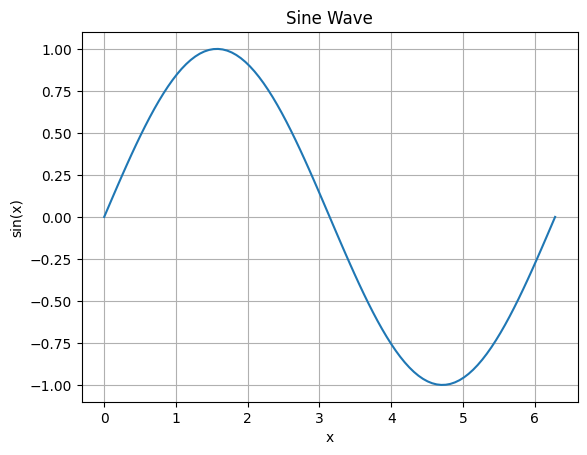

In [6]:
x = np.linspace(0, 2 * np.pi, 100)
y = np.sin(x)

plt.plot(x, y)
plt.title("Sine Wave")
plt.xlabel("x")
plt.ylabel("sin(x)")
plt.grid(True)
plt.show()

### Image Display
Images can be represented as 2D (grayscale) or 3D (color) NumPy arrays.

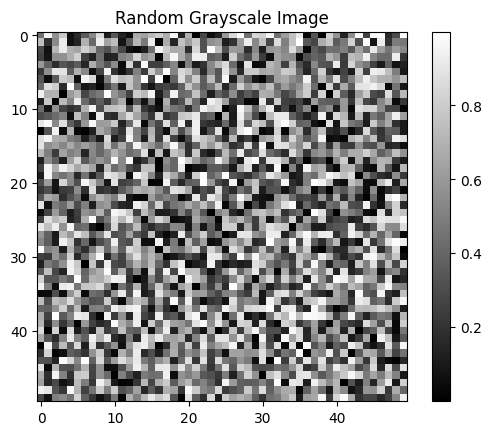

In [7]:
# Create a random 50x50 grayscale image
random_image = np.random.rand(50, 50)

plt.imshow(random_image, cmap='gray')
plt.title("Random Grayscale Image")
plt.colorbar()
plt.show()

## 12.3 With SciPy & Scikit-learn

SciPy (Scientific Python) and Scikit-learn (for machine learning) both use NumPy arrays as their primary data structure.

### Scikit-learn: Machine Learning Models

In [9]:
from sklearn.linear_model import LinearRegression

# Create sample data
# X should be a 2D array, y should be 1D
X = np.arange(10).reshape(-1, 1)
y = X * 2 + 1 + np.random.randn(10, 1)

# Create and fit the model
model = LinearRegression()
model.fit(X, y)

print(f"Coefficient: {model.coef_[0][0]:.2f}")
print(f"Intercept: {model.intercept_[0]:.2f}")

Coefficient: 1.97
Intercept: 0.87


### SciPy: Scientific Computing
SciPy provides more advanced scientific functions that build on NumPy.

Optimal parameters (a, b, c): [2.50805242 1.20217175 0.45059789]


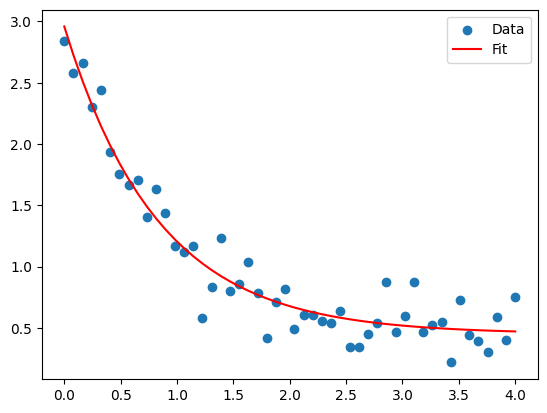

In [10]:
from scipy.optimize import curve_fit

# Define a function to fit
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

# Generate some data
x_data = np.linspace(0, 4, 50)
y_data = func(x_data, 2.5, 1.3, 0.5) + 0.2 * np.random.normal(size=len(x_data))

# Fit the curve
# SciPy takes NumPy arrays as input
popt, pcov = curve_fit(func, x_data, y_data)

print(f"Optimal parameters (a, b, c): {popt}")

# Optional: Plot the fit
plt.scatter(x_data, y_data, label='Data')
plt.plot(x_data, func(x_data, *popt), 'r-', label='Fit')
plt.legend()
plt.show()